In [11]:
# Q1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')


In [12]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

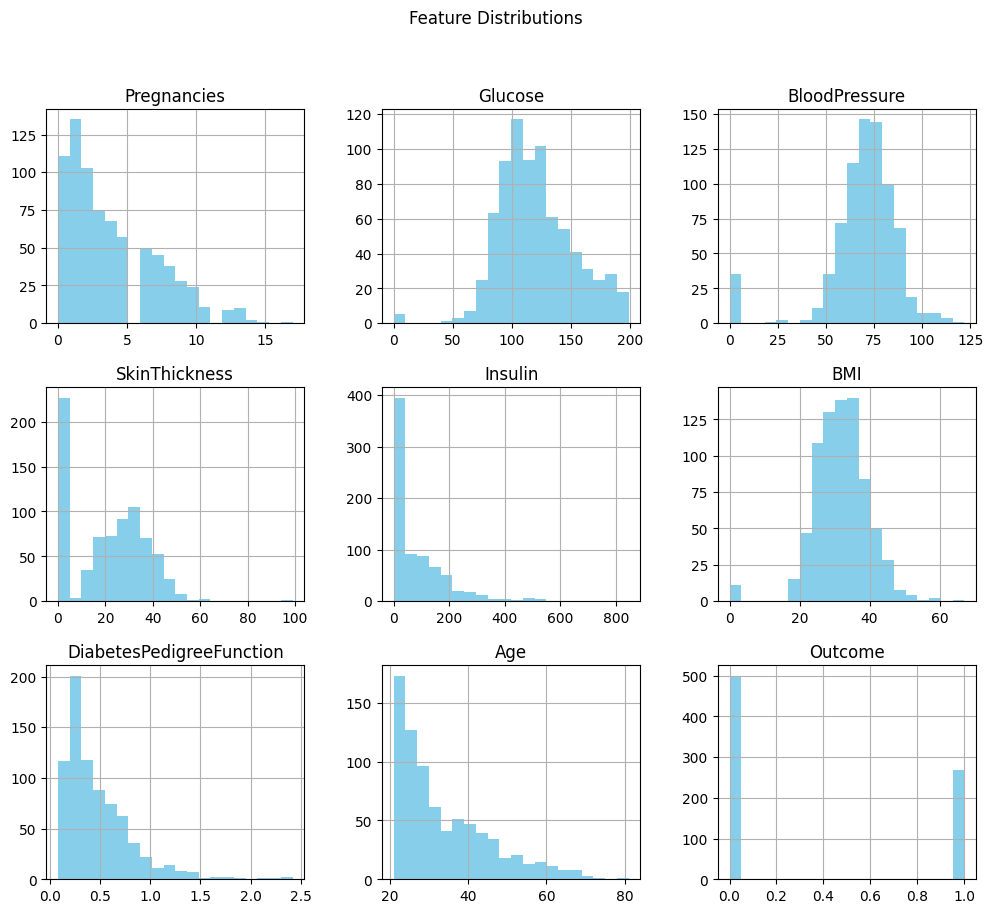

In [13]:
df.hist(figsize=(12, 10), bins=20, color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

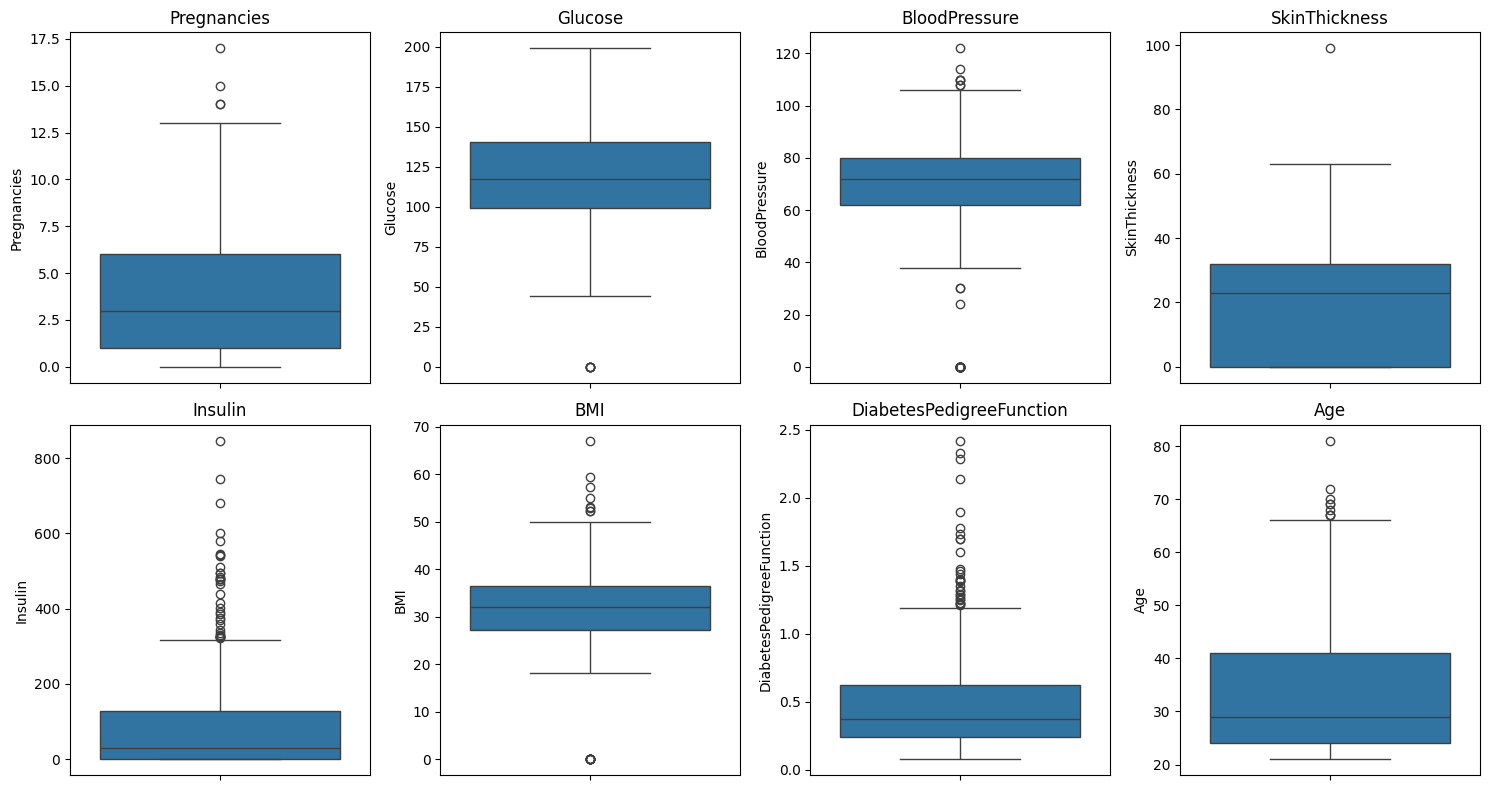

In [14]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


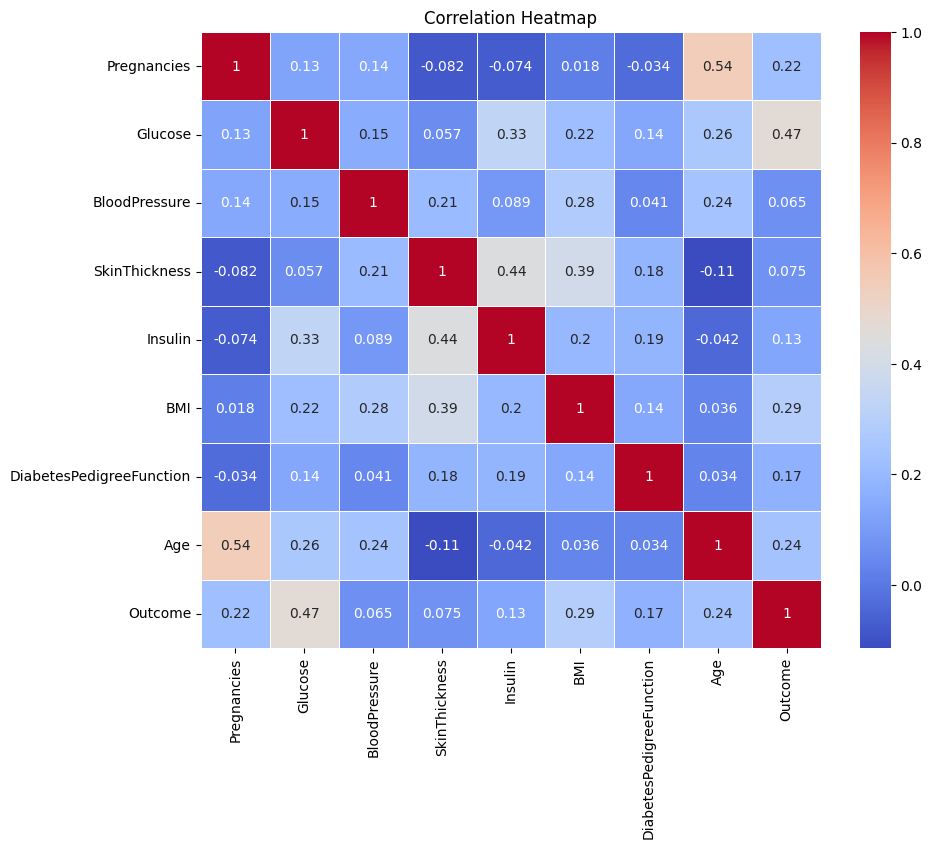

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

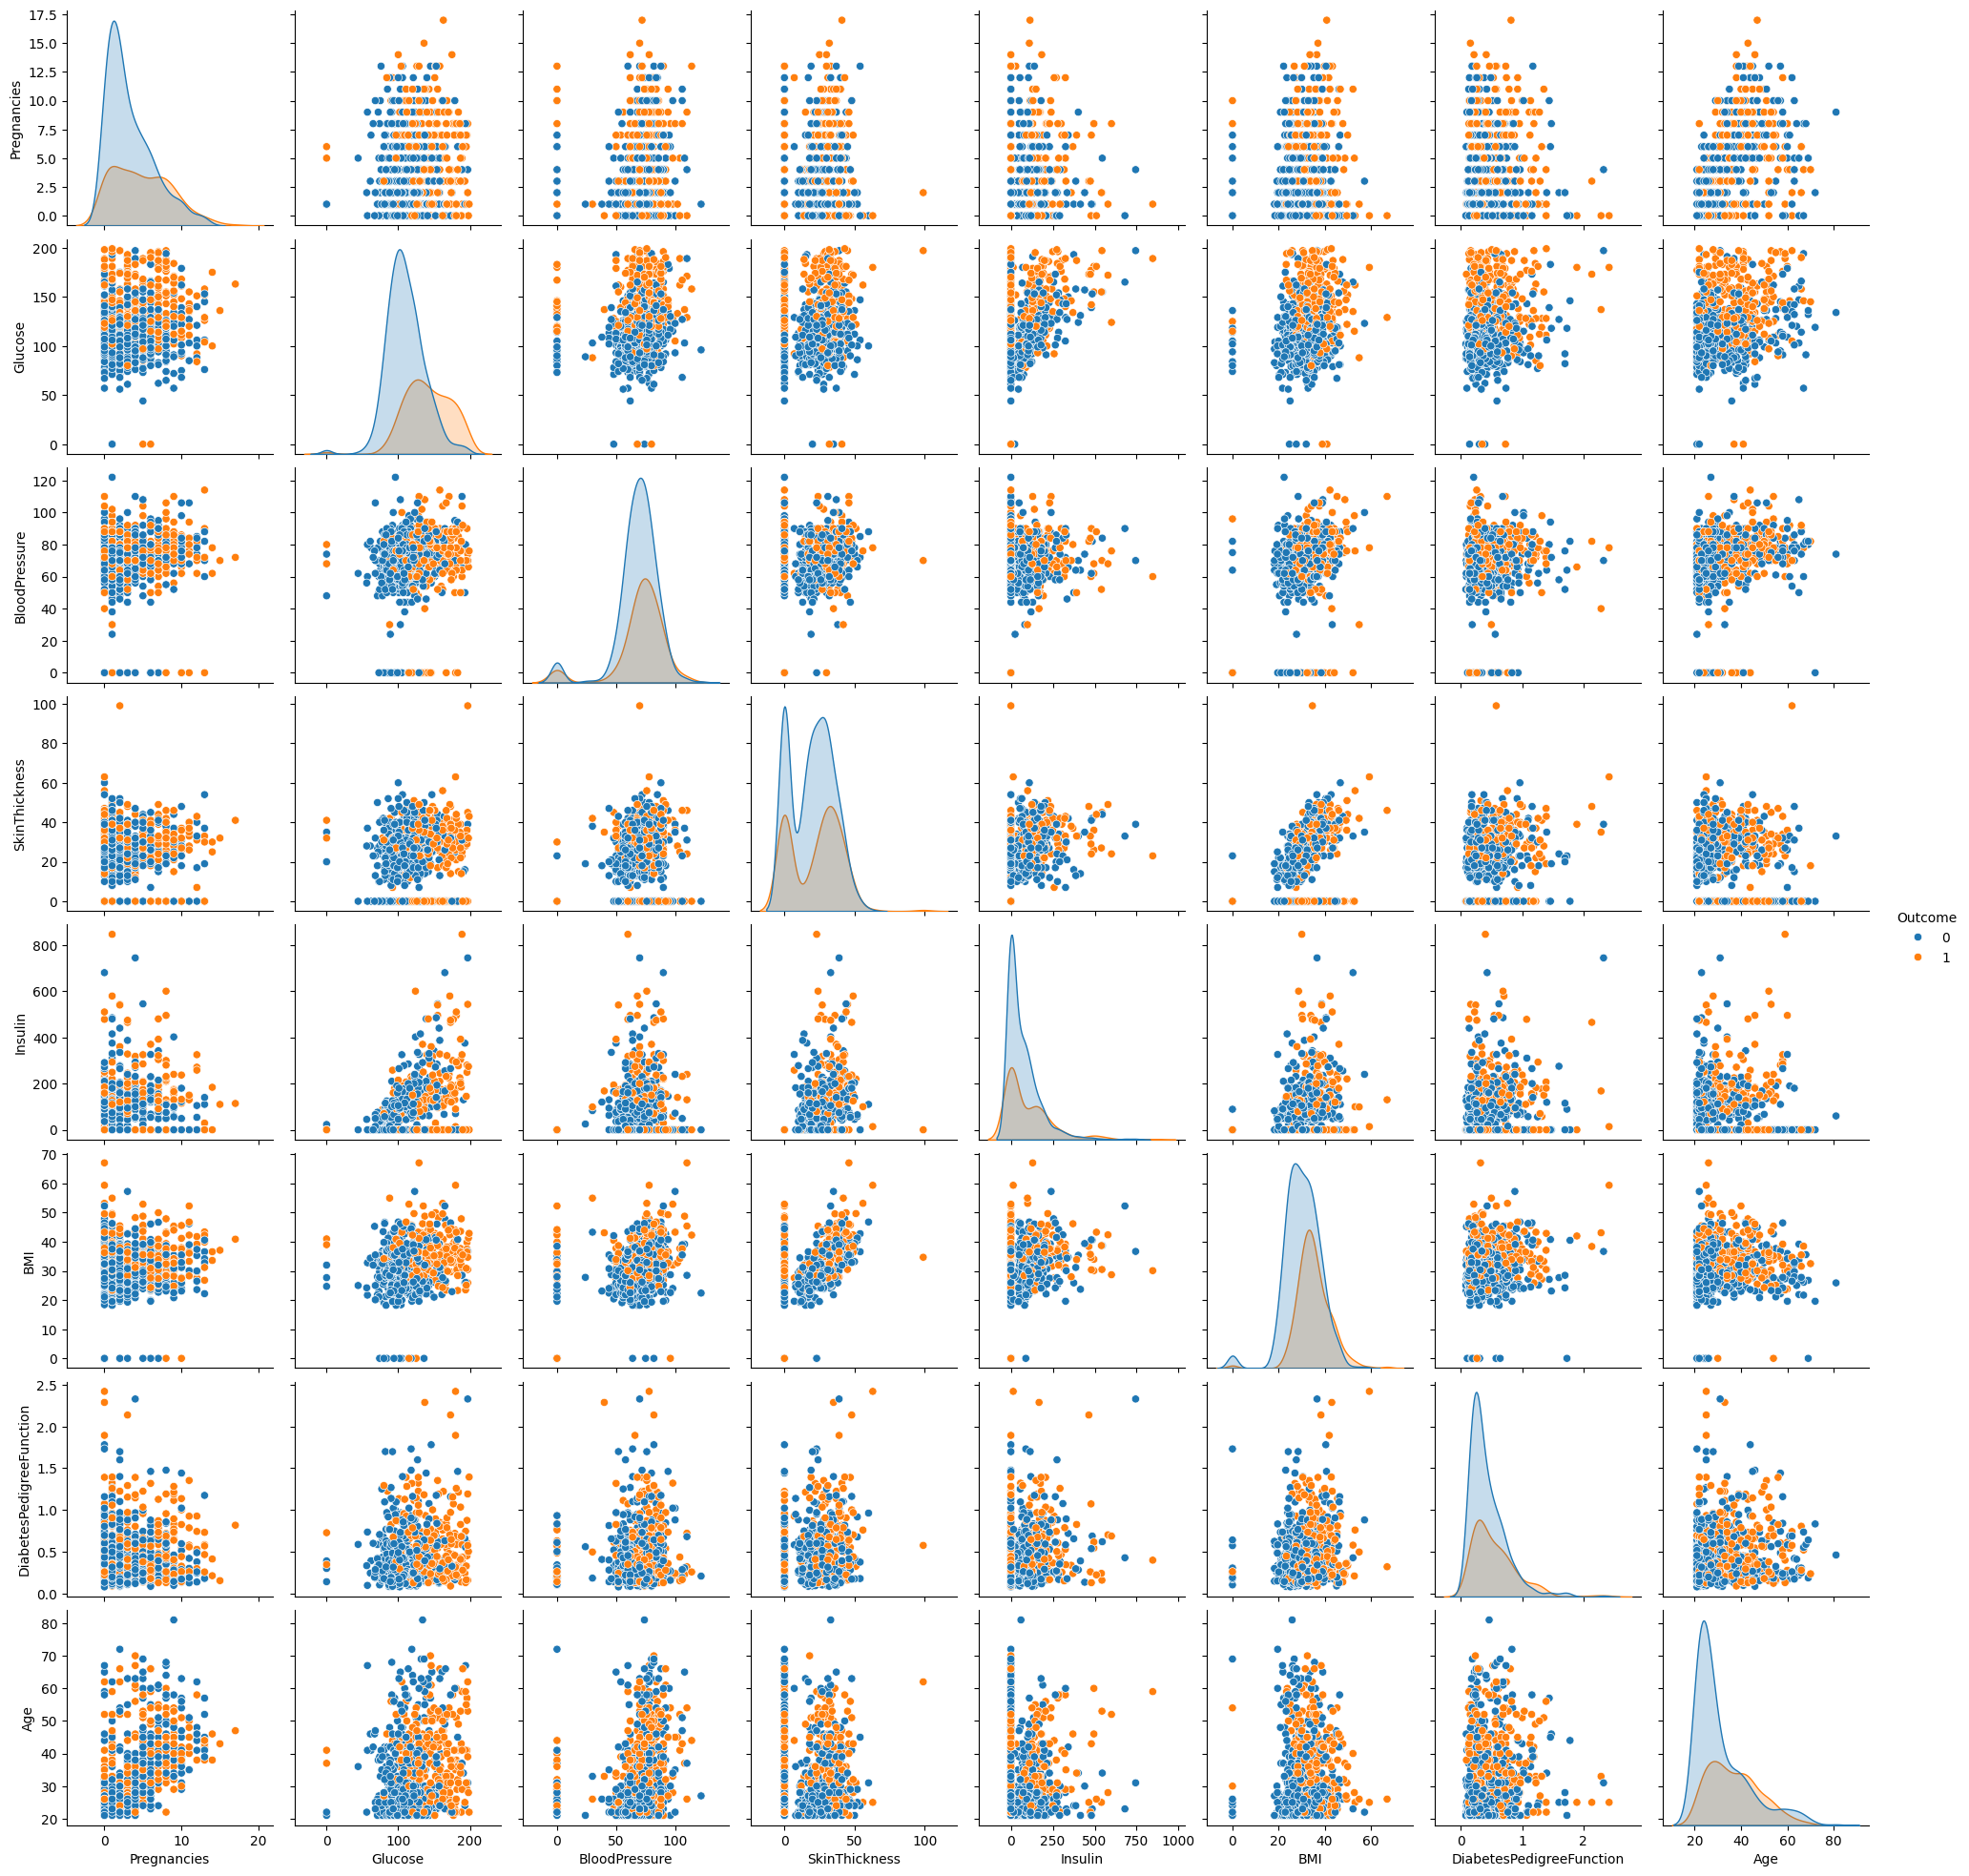

In [16]:
sns.pairplot(df, hue="Outcome")
plt.show()

In [17]:
# Q2

import numpy as np

cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [18]:

df.fillna(df.median(), inplace=True)


In [19]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = df.columns[:-1]
df = remove_outliers(df, numeric_cols)


In [21]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               332 non-null    int64  
 1   Glucose                   332 non-null    float64
 2   BloodPressure             332 non-null    float64
 3   SkinThickness             332 non-null    float64
 4   Insulin                   332 non-null    float64
 5   BMI                       332 non-null    float64
 6   DiabetesPedigreeFunction  332 non-null    float64
 7   Age                       332 non-null    int64  
 8   Outcome                   332 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 25.9 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin  \
count   332.000000  332.000000     332.000000     332.000000    332.0   
mean      4.361446  118.762048      73.566265      28.933735    125.0   
std       3.348186   

In [22]:
# Q3

from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (265, 8)
Test set: (67, 8)


In [23]:
# Q4

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [24]:

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [25]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [26]:
y_pred = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6567164179104478
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.50      0.57      0.53        23

    accuracy                           0.66        67
   macro avg       0.63      0.63      0.63        67
weighted avg       0.67      0.66      0.66        67



In [27]:
# Q5

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))
print("\nFull Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.657
Precision: 0.5
Recall: 0.565
F1 Score: 0.531

Full Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.50      0.57      0.53        23

    accuracy                           0.66        67
   macro avg       0.63      0.63      0.63        67
weighted avg       0.67      0.66      0.66        67



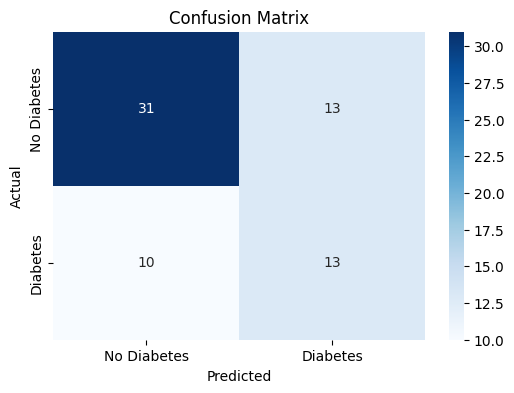

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


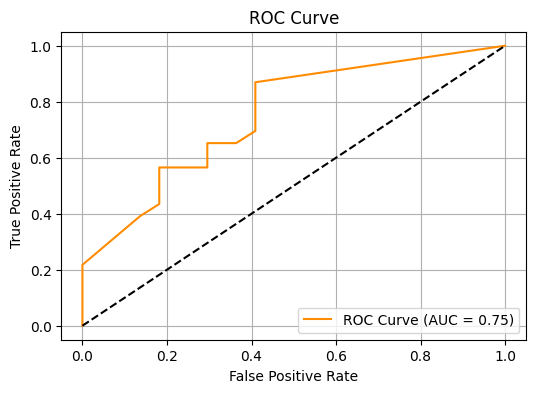

In [29]:
from sklearn.metrics import roc_curve, auc

y_proba = best_dt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


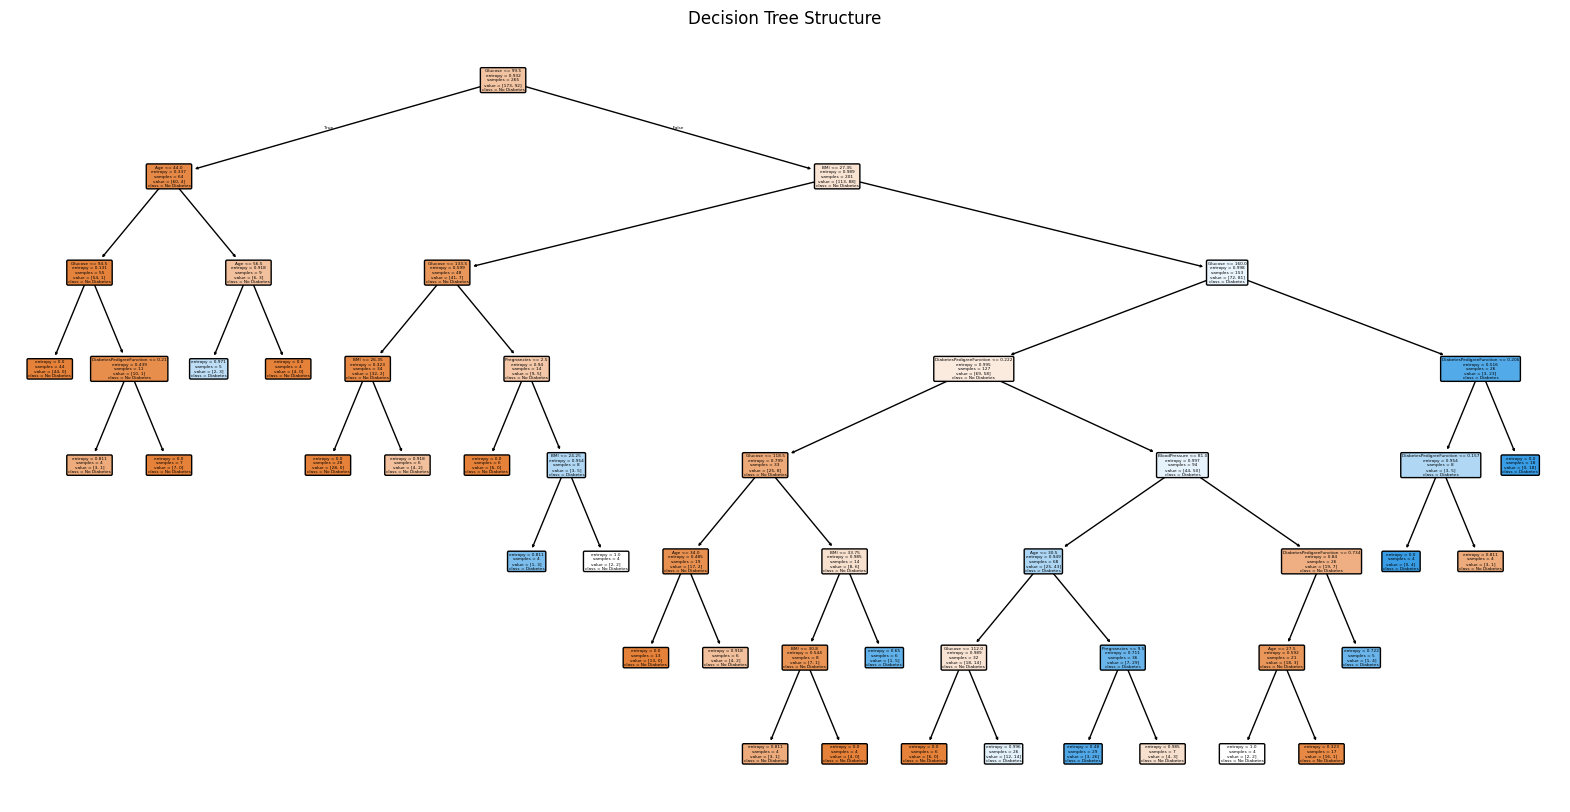

In [30]:
# Q6

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=["No Diabetes", "Diabetes"],
          filled=True,
          rounded=True)
plt.title("Decision Tree Structure")
plt.show()


In [31]:

import pandas as pd
import numpy as np

feature_importances = pd.Series(best_dt.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)


Feature Importances:
Glucose                     0.369343
BMI                         0.198726
DiabetesPedigreeFunction    0.158305
Age                         0.156169
Pregnancies                 0.068538
BloodPressure               0.048919
SkinThickness               0.000000
Insulin                     0.000000
dtype: float64


In [33]:
# Q7

new_patient = pd.DataFrame([{
    'Pregnancies': 2,
    'Glucose': 140,
    'BloodPressure': 75,
    'SkinThickness': 25,
    'Insulin': 100,
    'BMI': 32.0,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 35
}])

prediction = best_dt.predict(new_patient)
print("Predicted Outcome:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Predicted Outcome: Diabetic


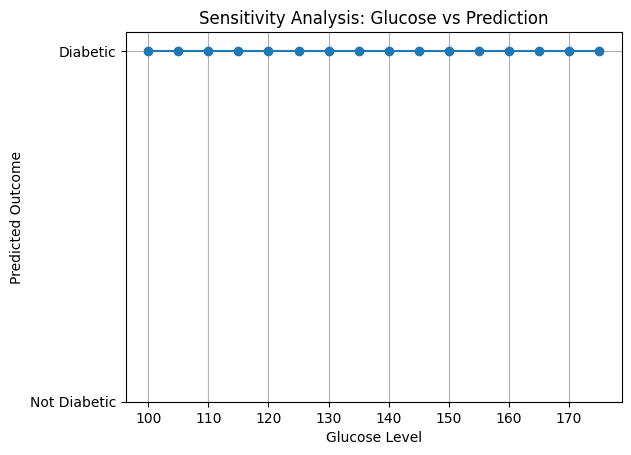

In [34]:
import numpy as np

glucose_range = np.arange(100, 180, 5)
sensitivity_test = []

for g in glucose_range:
    test_patient = new_patient.copy()
    test_patient['Glucose'] = g
    pred = best_dt.predict(test_patient)[0]
    sensitivity_test.append((g, pred))

# Plot
import matplotlib.pyplot as plt

glucose_values, outcomes = zip(*sensitivity_test)
plt.plot(glucose_values, outcomes, marker='o')
plt.title("Sensitivity Analysis: Glucose vs Prediction")
plt.xlabel("Glucose Level")
plt.ylabel("Predicted Outcome")
plt.yticks([0,1], ["Not Diabetic", "Diabetic"])
plt.grid(True)
plt.show()


In [35]:

scenario_1 = pd.DataFrame([{
    'Pregnancies': 0, 'Glucose': 180, 'BloodPressure': 70,
    'SkinThickness': 20, 'Insulin': 85, 'BMI': 20.0,
    'DiabetesPedigreeFunction': 0.3, 'Age': 28
}])

scenario_2 = pd.DataFrame([{
    'Pregnancies': 1, 'Glucose': 95, 'BloodPressure': 72,
    'SkinThickness': 30, 'Insulin': 150, 'BMI': 40.0,
    'DiabetesPedigreeFunction': 0.6, 'Age': 45
}])

print("Scenario 1 Prediction:", "Diabetic" if best_dt.predict(scenario_1)[0] == 1 else "Not Diabetic")
print("Scenario 2 Prediction:", "Diabetic" if best_dt.predict(scenario_2)[0] == 1 else "Not Diabetic")


Scenario 1 Prediction: Not Diabetic
Scenario 2 Prediction: Diabetic


In [36]:

X_test_noisy = X_test.copy()
noise = np.random.normal(0, 0.1, X_test_noisy.shape)
X_test_noisy += noise

y_pred_noisy = best_dt.predict(X_test_noisy)
print("Accuracy with noise:", accuracy_score(y_test, y_pred_noisy))


Accuracy with noise: 0.6417910447761194
